### Import Libraries

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

### Import Data

In [95]:
data=pd.read_csv("C:\Data Science\Project\climate change.csv")
print(data)

     Year  Month    MEI     CO2      CH4      N2O   CFC-11   CFC-12  \
0    1983      5  2.556  345.96  1638.59  303.677  191.324  350.113   
1    1983      6  2.167  345.52  1633.71  303.746  192.057  351.848   
2    1983      7  1.741  344.15  1633.22  303.795  192.818  353.725   
3    1983      8  1.130  342.25  1631.35  303.839  193.602  355.633   
4    1983      9  0.428  340.17  1648.40  303.901  194.392  357.465   
..    ...    ...    ...     ...      ...      ...      ...      ...   
303  2008      8 -0.266  384.15  1779.88  321.405  244.200  535.072   
304  2008      9 -0.643  383.09  1795.08  321.529  244.083  535.048   
305  2008     10 -0.780  382.99  1814.18  321.796  244.080  534.927   
306  2008     11 -0.621  384.13  1812.37  322.013  244.225  534.906   
307  2008     12 -0.666  385.56  1812.88  322.182  244.204  535.005   

           TSI  Aerosols   Temp  
0    1366.1024    0.0863  0.109  
1    1366.1208    0.0794  0.118  
2    1366.2850    0.0731  0.137  
3    1366.4

### Basic informations

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


## Data Cleaning

## Empty cells

In [97]:
data.isna().sum()

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

### Check Duplicates

In [98]:
print('Number of duplicated rows: ' , len(data[data.duplicated()]))

Number of duplicated rows:  0


## Ploting Boxplot

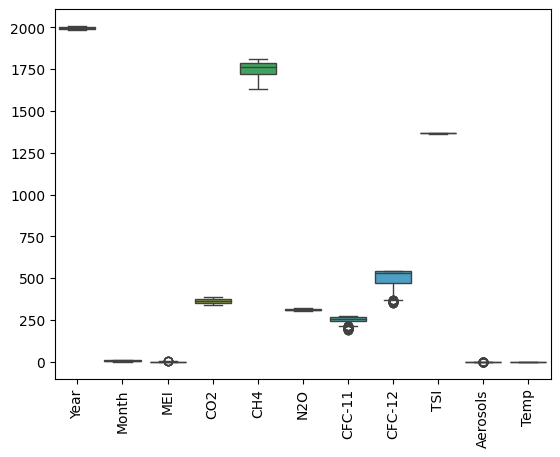

In [99]:
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

## Encoding Categorial Data

In [100]:
categ_col = data.select_dtypes(include=['object']).columns

# Initialize encoders
label_encoder = LabelEncoder()

# Encode each categorical column using Label Encoding for simplicity
encoded_data = data.copy()
for i in categ_col:
    encoded_data[i] = label_encoder.fit_transform(data[i])

# Display the first 5 rows of the encoded dataset
print(encoded_data)

     Year  Month    MEI     CO2      CH4      N2O   CFC-11   CFC-12  \
0    1983      5  2.556  345.96  1638.59  303.677  191.324  350.113   
1    1983      6  2.167  345.52  1633.71  303.746  192.057  351.848   
2    1983      7  1.741  344.15  1633.22  303.795  192.818  353.725   
3    1983      8  1.130  342.25  1631.35  303.839  193.602  355.633   
4    1983      9  0.428  340.17  1648.40  303.901  194.392  357.465   
..    ...    ...    ...     ...      ...      ...      ...      ...   
303  2008      8 -0.266  384.15  1779.88  321.405  244.200  535.072   
304  2008      9 -0.643  383.09  1795.08  321.529  244.083  535.048   
305  2008     10 -0.780  382.99  1814.18  321.796  244.080  534.927   
306  2008     11 -0.621  384.13  1812.37  322.013  244.225  534.906   
307  2008     12 -0.666  385.56  1812.88  322.182  244.204  535.005   

           TSI  Aerosols   Temp  
0    1366.1024    0.0863  0.109  
1    1366.1208    0.0794  0.118  
2    1366.2850    0.0731  0.137  
3    1366.4

## Extract Dependent and Independent Variables

In [101]:
X = encoded_data.iloc[:,0:5]   #Independent variable
y = encoded_data['Temp']     #dependent variable

## Statistical Analysis
### (Correlation,Describe) 

In [102]:
print(data.describe())

              Year       Month         MEI         CO2          CH4  \
count   308.000000  308.000000  308.000000  308.000000   308.000000   
mean   1995.662338    6.551948    0.275555  363.226753  1749.824513   
std       7.423197    3.447214    0.937918   12.647125    46.051678   
min    1983.000000    1.000000   -1.635000  340.170000  1629.890000   
25%    1989.000000    4.000000   -0.398750  353.020000  1722.182500   
50%    1996.000000    7.000000    0.237500  361.735000  1764.040000   
75%    2002.000000   10.000000    0.830500  373.455000  1786.885000   
max    2008.000000   12.000000    3.001000  388.500000  1814.180000   

              N2O      CFC-11      CFC-12          TSI    Aerosols        Temp  
count  308.000000  308.000000  308.000000   308.000000  308.000000  308.000000  
mean   312.391834  251.973068  497.524782  1366.070759    0.016657    0.256776  
std      5.225131   20.231783   57.826899     0.399610    0.029050    0.179090  
min    303.677000  191.324000  350.1

              Year     Month       MEI       CO2       CH4       N2O  \
Year      1.000000 -0.025789 -0.145345  0.985379  0.910563  0.994850   
Month    -0.025789  1.000000 -0.016345 -0.096287  0.017558  0.012395   
MEI      -0.145345 -0.016345  1.000000 -0.152911 -0.105555 -0.162375   
CO2       0.985379 -0.096287 -0.152911  1.000000  0.872253  0.981135   
CH4       0.910563  0.017558 -0.105555  0.872253  1.000000  0.894409   
N2O       0.994850  0.012395 -0.162375  0.981135  0.894409  1.000000   
CFC-11    0.460965 -0.014914  0.088171  0.401284  0.713504  0.412155   
CFC-12    0.870067 -0.001084 -0.039836  0.823210  0.958237  0.839295   
TSI       0.022353 -0.032754 -0.076826  0.017867  0.146335  0.039892   
Aerosols -0.361884  0.014845  0.352351 -0.369265 -0.290381 -0.353499   
Temp      0.755731 -0.098016  0.135292  0.748505  0.699697  0.743242   

            CFC-11    CFC-12       TSI  Aerosols      Temp  
Year      0.460965  0.870067  0.022353 -0.361884  0.755731  
Month    -0.0

<Axes: >

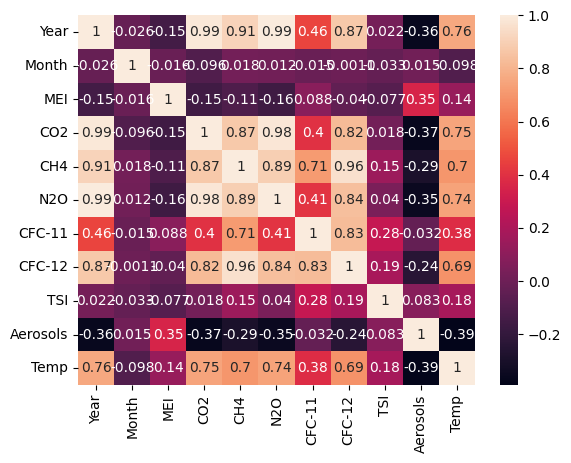

In [103]:
correlation=encoded_data.corr(numeric_only=True)
print(correlation)
sns.heatmap(correlation,annot=True)

## Split Train and Test Data

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Model

In [106]:
# Example: Categorize 'Temp' into discrete bins
y_train = pd.cut(y_train, bins=[-float('inf'), 0, 1, float('inf')], labels=[0, 1, 2])
y_test = pd.cut(y_test, bins=[-float('inf'), 0, 1, float('inf')], labels=[0, 1, 2])

# Now apply Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Creating a DataFrame to compare the actual and predicted results
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(data)


    Actual  Predicted
288      1          1
9        1          1
57       1          1
60       1          1
25       0          1
..     ...        ...
198      1          1
195      1          1
210      1          1
224      1          1
158      1          1

[62 rows x 2 columns]


In [107]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.32%


In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

In [109]:
lr = LogisticRegression(max_iter=1000)  # Logistic Regression
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Random Forest Classifier
svc = SVC(kernel='linear', random_state=42)  # Support Vector Classifier (SVC)

# Train the models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
svc.fit(X_train, y_train)

# Predict the test set results
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svc = svc.predict(X_test)

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")
print(f"Random Forest Classifier Accuracy: {accuracy_rf * 100:.2f}%")
print(f"SVC Accuracy: {accuracy_svc * 100:.2f}%")

Logistic Regression Accuracy: 90.32%
Random Forest Classifier Accuracy: 93.55%
SVC Accuracy: 88.71%
